In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

 # Import The Data

In [2]:
data =pd. read_csv("D:/Data Secience/Assignment/Simple Linear Regression/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analyst

In [4]:
df=data.copy()
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# Data Structure
df.shape

(30, 2)

In [6]:
#Duplicate
df[df.duplicated()].shape

(0, 2)

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

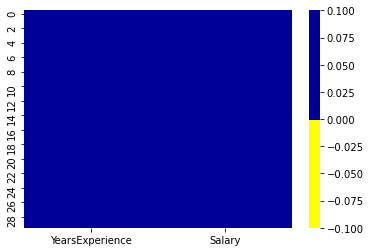

In [8]:
# Missing values and Imputation
cols=df.columns
colours=['#ffff00','#000099']
sns.heatmap(df[cols].isnull(),
           cmap=sns.color_palette(colours))

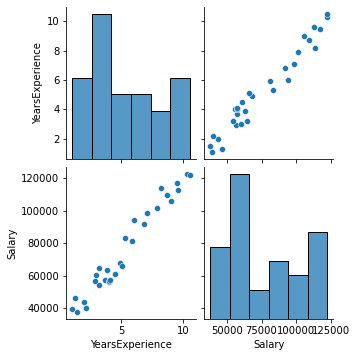

In [9]:
# Scatter plot and Correlation Analysis
sns.pairplot(df)

 ## Outlier detection
### Box plot and interquartile range

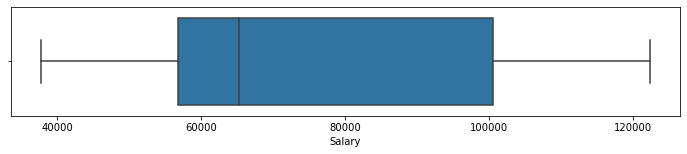

In [13]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Salary'], whis=1.5)

whis=1.5 1st quartile = 59000

3rd quartile = 100000

Quartile range = (3rd quartile - 1st quartile) = 100000-59000 = 41000

Whisker on the upper side

3rd quartile + (Quartile range whis) = 100000+ (41000 *1.5) = 100000+61500 = 161500

There is no outliers above the whisker 1200000.

Whisker on th lower side

1st quartile - (Quartile range whis) = 59000 - (41000*1.5) = 59000-61500=-2500

There is no outliers on the negative side of the lower whisker

### Conclusion for selecting whis = 1.5
So from the above analysis of whis 1.5, we should select the whis=1.5 quartile range. Because we don't want to miss any of the data in this time series analysis.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.shape

(30, 2)

In [11]:
data[data.duplicated()].shape

(0, 2)

In [26]:
data=data.rename({'YearsExperience':'YE','Salary':'SL'}, axis=1)

In [27]:
data.head()

,YE,SL
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


 # Fitting a Linear Regression Model

In [28]:
import statsmodels.formula.api as smf
model = smf.ols("YE~SL", data=data).fit()

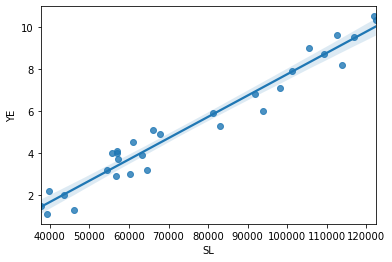

In [31]:
sns.regplot(x="SL", y="YE", data=data);

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        17:33:39   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
SL             0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 # Coefficients

In [33]:
model.params

Intercept   -2.383161
SL           0.000101
dtype: float64

 # Predict for new data point

In [44]:
#Predict for 39343 and 66029 Salary
newdata=pd.Series([39343,66029])

In [45]:
data_pred=pd.DataFrame(newdata,columns=['SL'])

In [46]:
model.predict(data_pred)

0    1.600934
1    4.303310
dtype: float64